In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import cufflinks as cf
import plotly.express as px 
import plotly.graph_objects as go
import plotly.offline as pyo 
pyo.init_notebook_mode(connected=True)
cf.go_offline()  


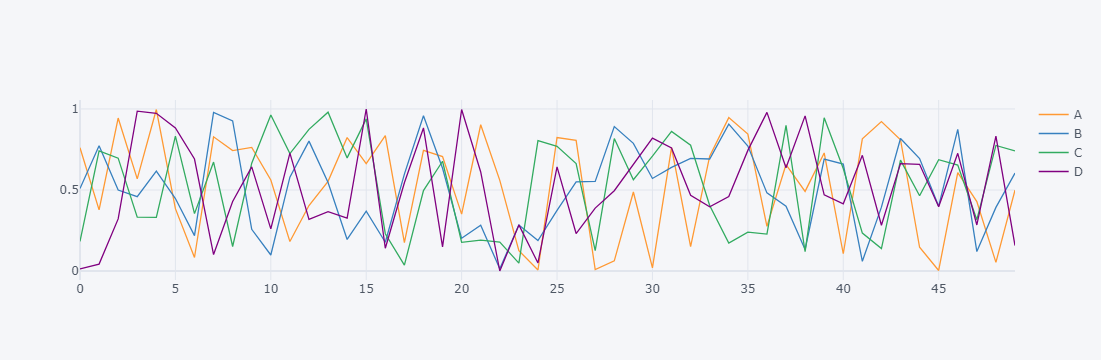

In [5]:
arr1 = np.random.rand(50,4)
df1 = pd.DataFrame(arr1,columns=['A','B','C','D'])
df1.iplot()

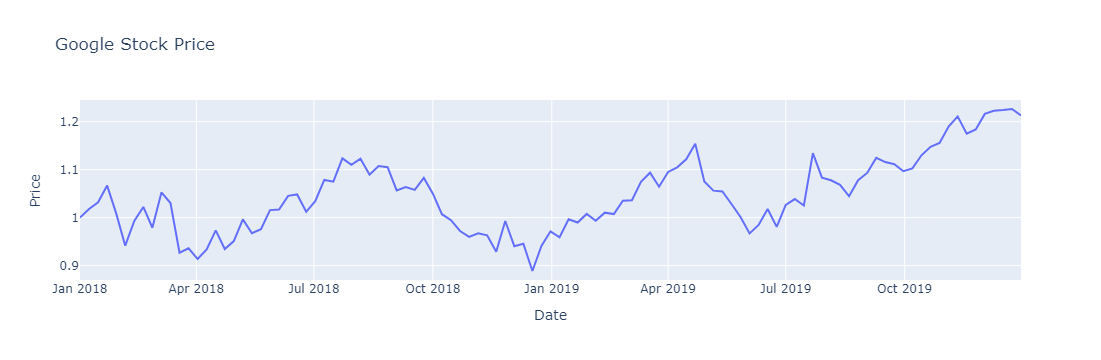

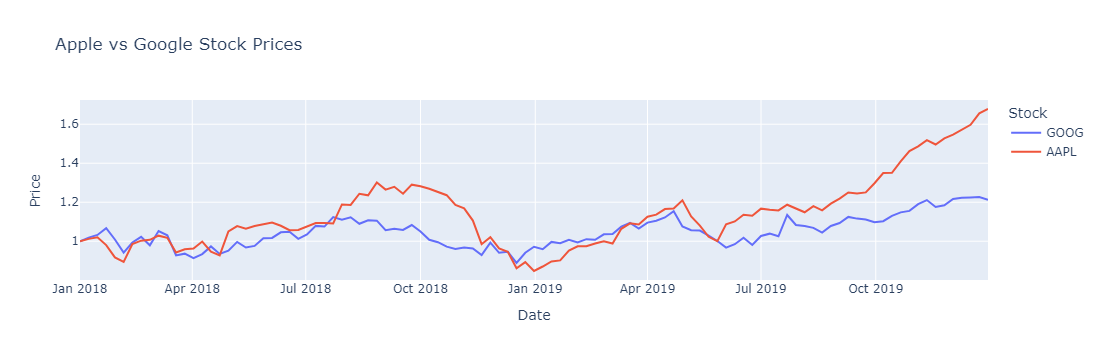

In [6]:
import plotly.express as px

# Load sample stock data
stocks_df = px.data.stocks()

# Single line plot for Google
fig1 = px.line(stocks_df, x='date', y='GOOG', labels={'date': 'Date', 'GOOG': 'Price'}, title="Google Stock Price")
fig1.show()

# Multi-line plot for Google & Apple
fig2 = px.line(stocks_df, x='date', y=['GOOG', 'AAPL'], 
               labels={'date': 'Date', 'value': 'Price', 'variable': 'Stock'},
               title='Apple vs Google Stock Prices')
fig2.show()


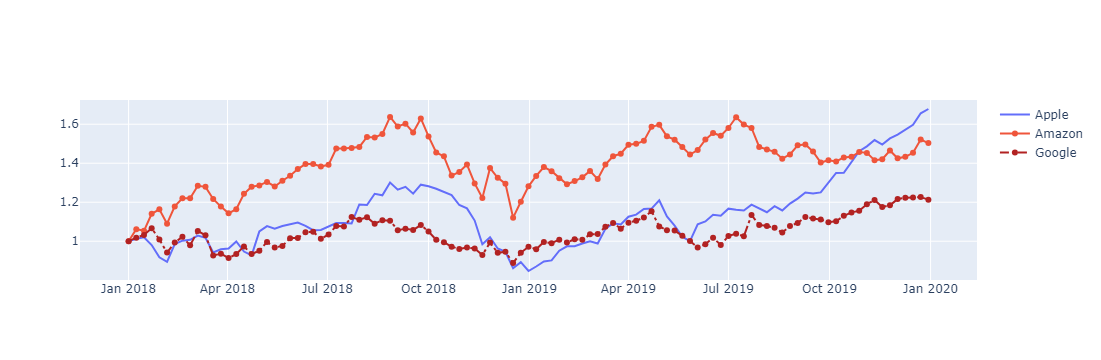

In [7]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=stocks_df.date,y=stocks_df.AAPL,mode='lines',name='Apple'))
fig.add_trace(go.Scatter(x=stocks_df.date,y=stocks_df.AMZN,mode='lines+markers',name='Amazon'))
fig.add_trace(go.Scatter(x=stocks_df.date,y=stocks_df.GOOG,mode='lines+markers',name='Google',line=dict(color='firebrick',width=2,dash='dashdot')))

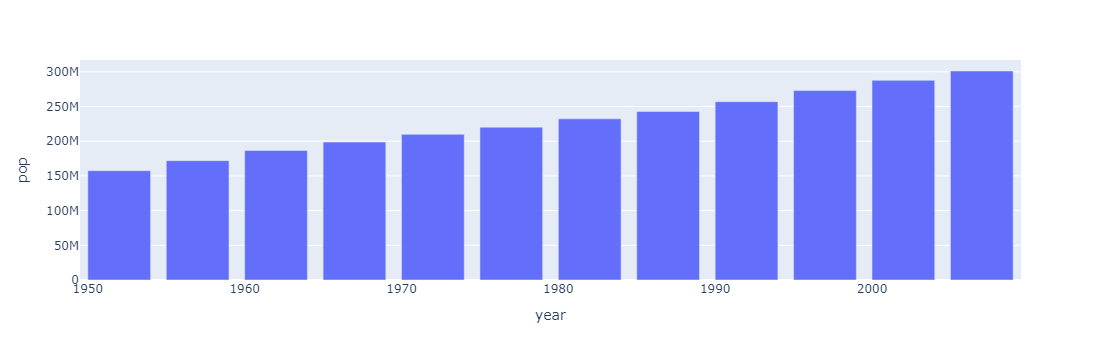

In [8]:
#barchart 
df_us = px.data.gapminder().query("country == 'United States'")
px.bar(df_us,x="year",y="pop")

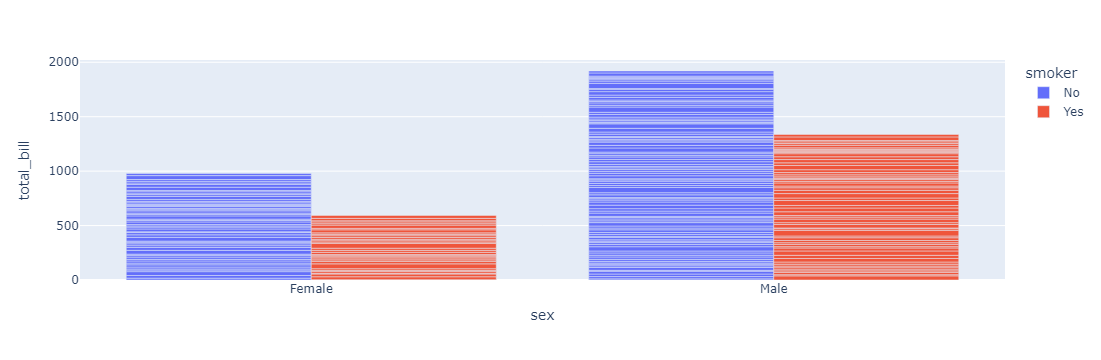

In [13]:
df_tip = px.data.tips()
px.bar(df_tip,x='day',y='tip',color='sex',title='Tips of Sex based on Each Day',labels={'tip':'Tip Amount','day':'Day of Week'})
px.bar(df_tip,x='sex',y='total_bill',color='smoker', barmode='group')

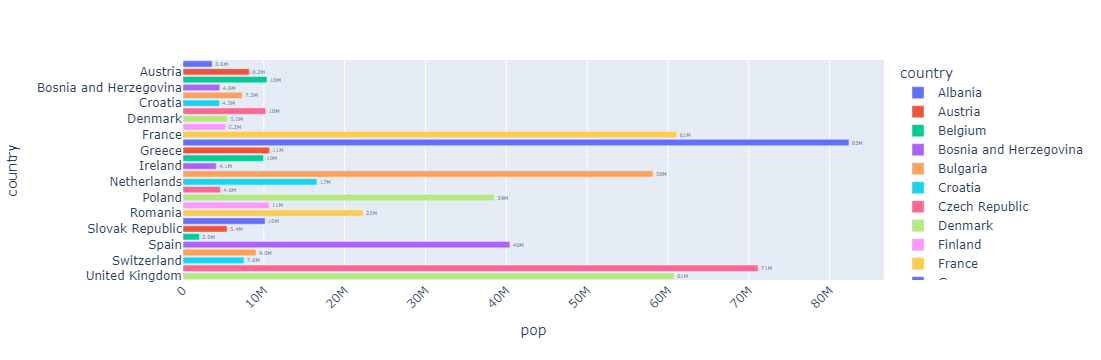

In [17]:
df_Eu = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop >2.e6")
fig = px.bar(df_Eu,x='pop',y='country',text='pop',color='country')
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle=-45)
fig

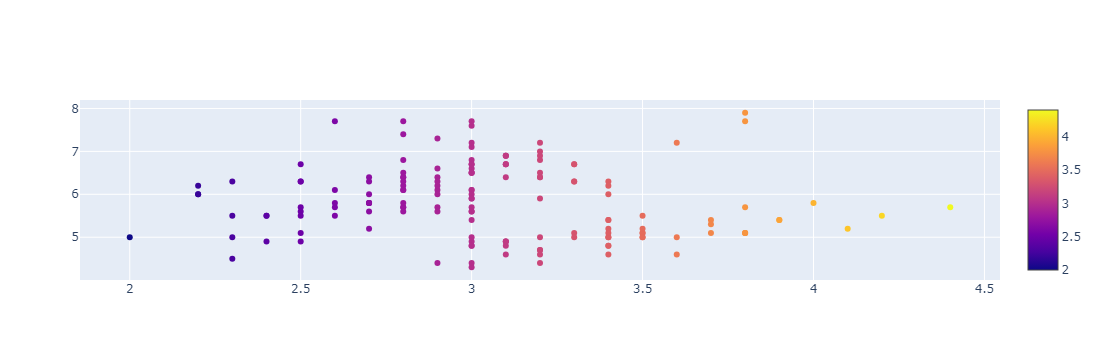

In [22]:
df_iris = px.data.iris()
px.scatter(df_iris,x='sepal_width',y='sepal_length',color='species',size='petal_length',hover_data=['petal_width'])
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_iris.sepal_width,
    y=df_iris.sepal_length,
    mode='markers',
    marker_color=df_iris.sepal_width,  # Color points based on sepal width
    text=df_iris.species,  # Display species when hovering
    marker=dict(showscale=True)  # Show color scale for marker colors
))


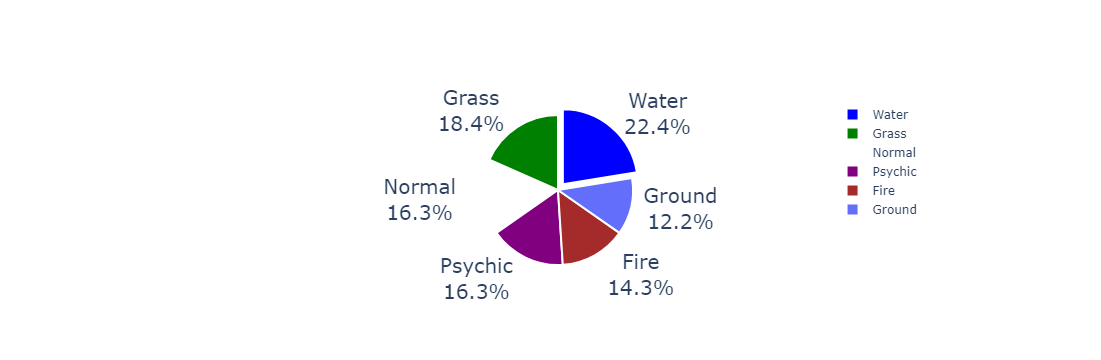

In [28]:
df_asia = px.data.gapminder().query("year == 2007 and continent == 'Asia'")

# Pie chart for Asian country populations
px.pie(df_asia, 
       values='pop', 
       names='country', 
       title='Population of Asian Countries', 
       color_discrete_sequence=px.colors.sequential.RdBu)

# Custom Pokémon-type Pie Chart
colors = ['blue', 'green', 'white', 'purple', 'brown']
fig = go.Figure(data=[go.Pie(
    labels=['Water', 'Grass', 'Normal', 'Psychic', 'Fire', 'Ground'], 
    values=[110, 90, 80, 80, 70, 60]
)])

# Update styling
fig.update_traces(
    hoverinfo='label+percent',  
    textfont_size=20,  
    textinfo="label+percent",  
    pull=[0.1, 0, 0.2, 0, 0, 0],  
    marker=dict(colors=colors, line=dict(color='#FFFFFF', width=2))  # ✅ Fixed Syntax Here
)

fig.show()

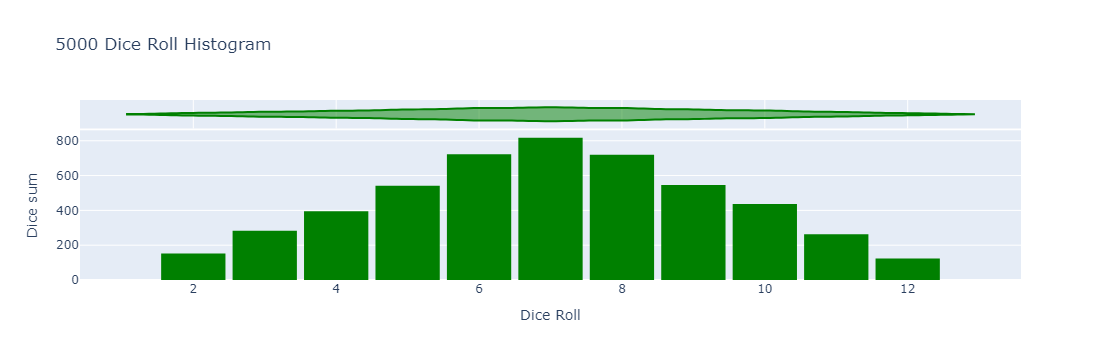

In [8]:
dice1 = np.random.randint(1, 7, 5000)
dice2 = np.random.randint(1, 7, 5000)
dice_sum = dice1 + dice2

# Creating histogram
fig = px.histogram(x=dice_sum, nbins=11,
                   labels={'x': 'Dice Roll'},
                   title='5000 Dice Roll Histogram',
                   marginal='violin',
                   color_discrete_sequence=['green'])
fig.update_layout(
    xaxis_title_text='Dice Roll',
    yaxis_title_text='Dice sum',
    bargap=0.1,
    showlegend=False
)

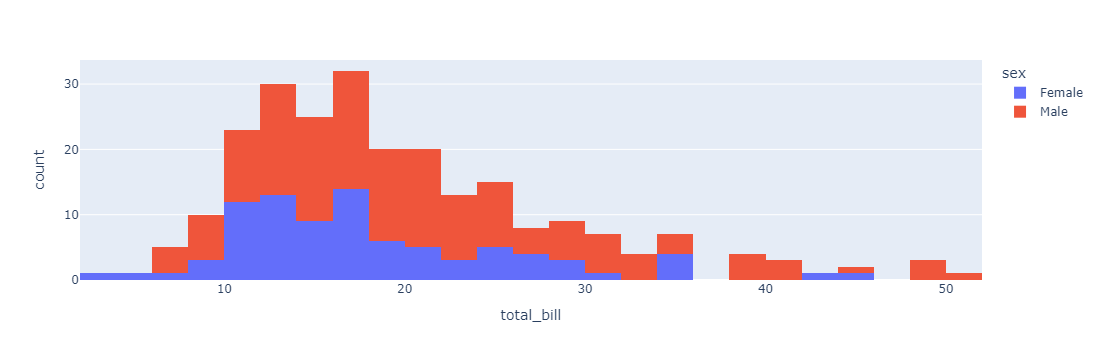

In [9]:
df_tips = px.data.tips()
px.histogram(df_tips,x='total_bill',color='sex')

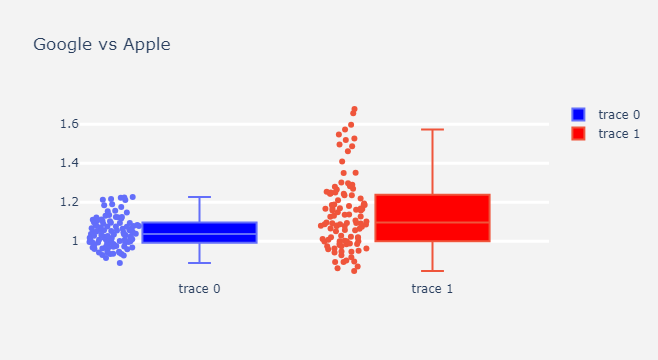

In [25]:
px.box(df_tips,x='sex',y='tip',points='all')
px.box(df_tips,x='day',y='tip',color='sex')
fig = go.Figure()
fig.add_trace(go.Box(
    x=df_tips.sex,
    y=df_tips.tip,
    marker_color = 'blue',
    boxmean='sd'
))

df_stocks = px.data.stocks()
fig = go.Figure()
fig.add_trace(go.Box(
    y=df_stocks.GOOG, 
    boxpoints='all', 
    fillcolor='blue', 
    jitter=0.5,
    whiskerwidth=0.2
))
fig.add_trace(go.Box(
    y=df_stocks.AAPL, 
    boxpoints='all', 
    fillcolor='red', 
    jitter=0.5,
    whiskerwidth=0.2
))
fig.update_layout(
    title='Google vs Apple',
    yaxis=dict(gridcolor='rgb(255,255,255)', gridwidth=3),  # Fixed gridcolor syntax
    paper_bgcolor='rgb(243,243,243)',
    plot_bgcolor='rgb(243,243,243)'
)


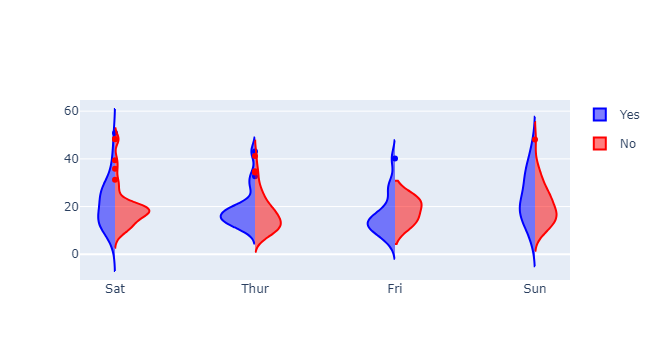

In [30]:
px.violin(df_tips,y='total_bill',box=True,points='all')
px.violin(df_tips,y='tip'
          ,x='smoker',
          color='sex',
          box=True,
          points='all',
          hover_data=df_tips.columns
)

fig = go.Figure()

fig.add_trace(go.Violin(
    x=df_tips['day'][df_tips['smoker'] == 'Yes'],
    y=df_tips['total_bill'][df_tips['smoker'] == 'Yes'],
    legendgroup='Yes',
    scalegroup='Yes',
    name='Yes',
    side='negative',  
    line_color='blue'
))

fig.add_trace(go.Violin(
    x=df_tips['day'][df_tips['smoker'] == 'No'],
    y=df_tips['total_bill'][df_tips['smoker'] == 'No'],
    legendgroup='No',  
    scalegroup='No',  
    name='No',
    side='positive',  
    line_color='red'
))


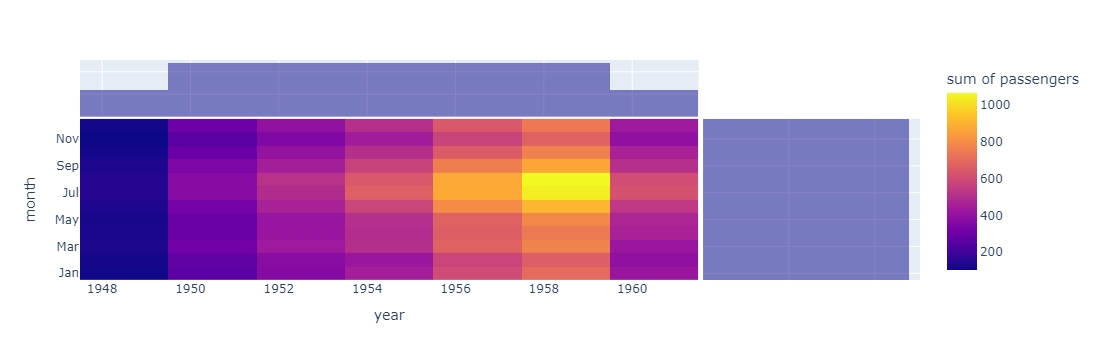

In [36]:
flights = sns.load_dataset('flights')
fig = px.density_heatmap(flights,x='year',y='month',
                         z='passengers',
                        marginal_x='histogram',
                        marginal_y='histogram',
                        )
fig

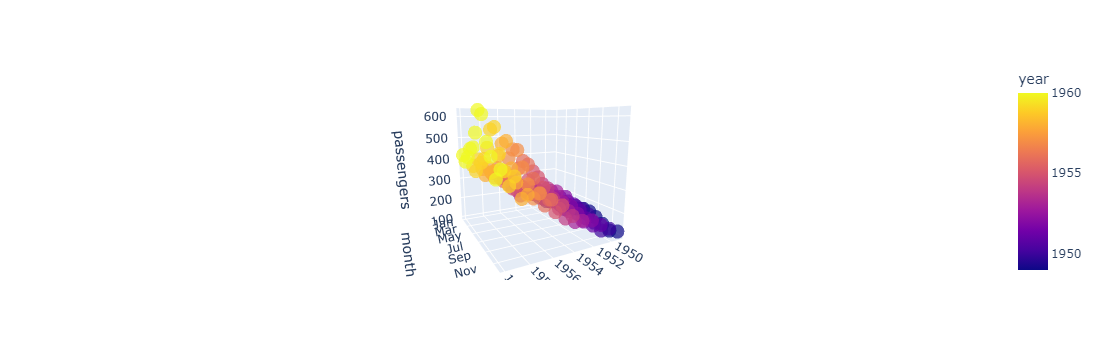

In [37]:
px.scatter_3d(flights,x='year',y='month',z='passengers',color='year',opacity=0.7)

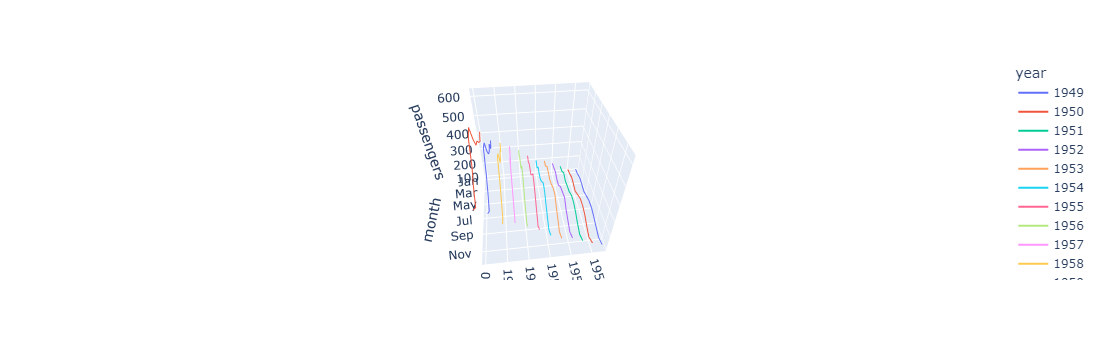

In [39]:
px.line_3d(flights,x='year',y='month',z='passengers',color='year')

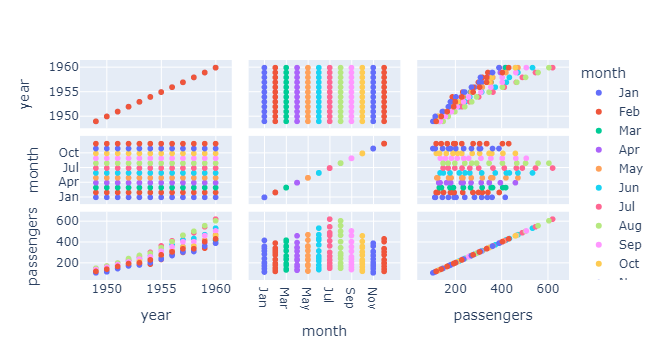

In [40]:
px.scatter_matrix(flights, color='month')

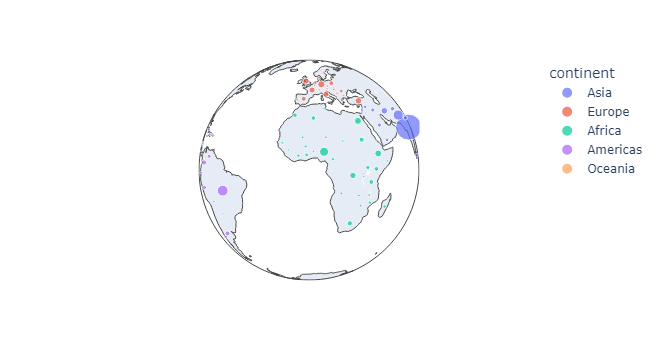

In [43]:
df = px.data.gapminder().query("year == 2007")
fig = px.scatter_geo(df, locations='iso_alpha',
                     color='continent',
                     hover_name='country',
                     size='pop',
                     projection='orthographic')
fig

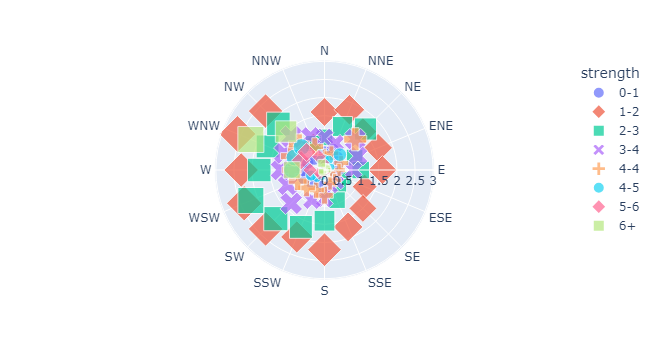

In [46]:
df_wind = px.data.wind()
px.scatter_polar(df_wind,r='frequency',
                 theta='direction',
                 color='strength',
                 size='frequency',
                 symbol='strength')

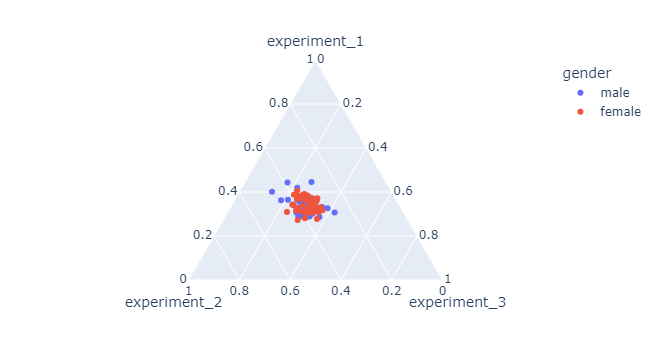

In [2]:
#ternary plot 
df_exp = px.data.experiment()
px.scatter_ternary(df_exp,a='experiment_1',
                  b='experiment_2', 
                  c='experiment_3', 
                  hover_name='group',color='gender')

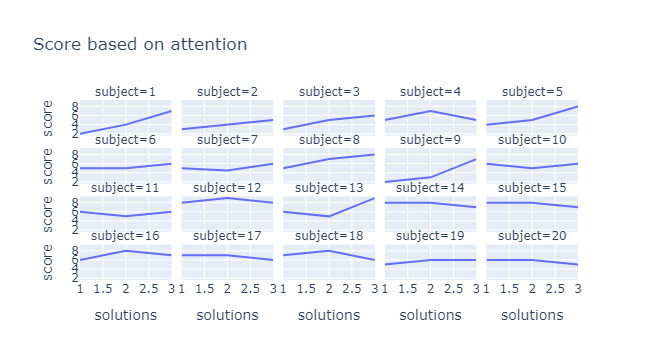

In [7]:
df_tips = px.data.tips()
px.scatter(df_tips,x='total_bill',y='tip',color='smoker',facet_col='sex')
px.histogram(df_tips,x='total_bill',y='tip',color='sex',facet_row='time',facet_col='day', 
            category_orders={'day':['Thur','Fri','Sat','Sun'],
                            'time':['Lunch','Dinner']})
att_df = sns.load_dataset('attention')
fig = px.line(att_df,x='solutions',y='score',facet_col='subject', 
             facet_col_wrap=5,title="Score based on attention")
fig

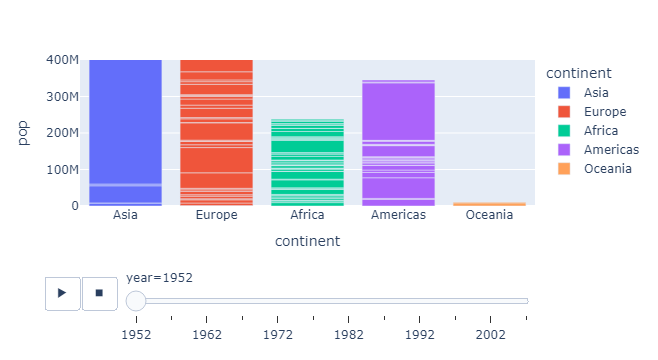

In [11]:
#Animated plots 
df_cnt = px.data.gapminder()
px.scatter(df_cnt, x='gdpPercap',y='lifeExp',animation_frame='year',animation_group='country', 
          size_max='pop',color='continent',hover_name='country',log_x=True,range_x=[100,10000],range_y=[25,90])
px.bar(df_cnt,x='continent',y='pop',color='continent', 
      animation_frame='year',animation_group='country', 
      range_y=[0,400000000])